In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
#Reading the data
cereals = pd.read_csv("Cereals.csv")
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [4]:
# Assiging the names column to the Rownames for good labeling .
cereals.index = cereals["name"]

In [5]:
list(cereals.index)

['100%_Bran',
 '100%_Natural_Bran',
 'All-Bran',
 'All-Bran_with_Extra_Fiber',
 'Almond_Delight',
 'Apple_Cinnamon_Cheerios',
 'Apple_Jacks',
 'Basic_4',
 'Bran_Chex',
 'Bran_Flakes',
 "Cap'n'Crunch",
 'Cheerios',
 'Cinnamon_Toast_Crunch',
 'Clusters',
 'Cocoa_Puffs',
 'Corn_Chex',
 'Corn_Flakes',
 'Corn_Pops',
 'Count_Chocula',
 "Cracklin'_Oat_Bran",
 'Cream_of_Wheat_(Quick)',
 'Crispix',
 'Crispy_Wheat_&_Raisins',
 'Double_Chex',
 'Froot_Loops',
 'Frosted_Flakes',
 'Frosted_Mini-Wheats',
 'Fruit_&_Fibre_Dates,_Walnuts,_and_Oats',
 'Fruitful_Bran',
 'Fruity_Pebbles',
 'Golden_Crisp',
 'Golden_Grahams',
 'Grape_Nuts_Flakes',
 'Grape-Nuts',
 'Great_Grains_Pecan',
 'Honey_Graham_Ohs',
 'Honey_Nut_Cheerios',
 'Honey-comb',
 'Just_Right_Crunchy__Nuggets',
 'Just_Right_Fruit_&_Nut',
 'Kix',
 'Life',
 'Lucky_Charms',
 'Maypo',
 'Muesli_Raisins,_Dates,_&_Almonds',
 'Muesli_Raisins,_Peaches,_&_Pecans',
 'Mueslix_Crispy_Blend',
 'Multi-Grain_Cheerios',
 'Nut&Honey_Crunch',
 'Nutri-Grain_Almond-

In [6]:
#Dropping the names column as we have assigned the names column to the Rownmes 
numeric_vars = cereals.drop(['name'],axis=1)

In [7]:
numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
name,,,,,,,,,,,,,
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [8]:
#deleting the header of the Rownames "name", to look data nice with out confusion.
del numeric_vars.index.name

In [9]:
numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [12]:
#Checking the sum of null values 
numeric_vars.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [13]:
#Columns with null values 
numeric_vars.iloc[:,[6,7,8]] 
#numeric_vars.head()

,sugars,potass,vitamins
100%_Bran,6.0,280.0,25
100%_Natural_Bran,8.0,135.0,0
All-Bran,5.0,320.0,25
All-Bran_with_Extra_Fiber,0.0,330.0,25
Almond_Delight,8.0,NaN,25
Apple_Cinnamon_Cheerios,10.0,70.0,25
Apple_Jacks,14.0,30.0,25
Basic_4,8.0,100.0,25
Bran_Chex,6.0,125.0,25
Bran_Flakes,5.0,190.0,25


In [14]:
numeric_vars.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [15]:
#Imputation to impute the null values 
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(strategy="mean")
mean_imputer.fit(numeric_vars)
imputed_numeric_vars = pd.DataFrame(mean_imputer.fit_transform(numeric_vars),columns=numeric_vars.columns.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
#After imputation we could see no null values 
imputed_numeric_vars.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [17]:
#After imputation we could see rownameds as numeric values , assigning them back to names 
imputed_numeric_vars.index = cereals["name"]

In [18]:
#deleting the header of the rownames 
del imputed_numeric_vars.index.name

In [19]:
imputed_numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.0,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.0,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.0,0.50,93.704912
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.0,0.75,34.384843


In [20]:
imputed_numeric_vars.iloc[:,[6,7,8]] 
#numeric_vars.head()

,sugars,potass,vitamins
100%_Bran,6.000000,280.000000,25.0
100%_Natural_Bran,8.000000,135.000000,0.0
All-Bran,5.000000,320.000000,25.0
All-Bran_with_Extra_Fiber,0.000000,330.000000,25.0
Almond_Delight,8.000000,98.666667,25.0
Apple_Cinnamon_Cheerios,10.000000,70.000000,25.0
Apple_Jacks,14.000000,30.000000,25.0
Basic_4,8.000000,100.000000,25.0
Bran_Chex,6.000000,125.000000,25.0
Bran_Flakes,5.000000,190.000000,25.0


In [21]:
# Divide  data in to train and test
  
X_train, X_test= train_test_split(imputed_numeric_vars, test_size=0.150)

In [22]:
print(X_train.shape)
print(X_test.shape)

(65, 13)
(12, 13)


In [23]:
imputed_numeric_vars.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
100%_Bran,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,3.0,1.0,0.33,68.402973
100%_Natural_Bran,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,3.0,1.0,1.00,33.983679
All-Bran,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,3.0,1.0,0.33,59.425505
All-Bran_with_Extra_Fiber,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,3.0,1.0,0.50,93.704912
Almond_Delight,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,3.0,1.0,0.75,34.384843


In [24]:
#Standarising the data 
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

In [25]:
X_train_std[0:5,:]

array([[ 0.0893571 , -0.54108373,  0.04693233,  0.48931545, -0.90584026,
         1.50929794, -0.91993927, -0.95159734,  3.27071676,  0.96795503,
        -0.28941443,  0.72205783, -0.29729635],
       [-3.07875811, -0.54108373, -0.96993473, -1.90207586, -0.48224589,
        -1.3156969 , -1.59687572, -0.72869174, -1.3012529 ,  0.96795503,
        -3.67285653,  0.72205783,  1.4433647 ],
       [-0.43866211,  1.36002126,  0.04693233, -1.90207586, -0.90584026,
         0.22520938, -0.91993927, -0.05997494, -0.15826049, -0.24198876,
        -0.28941443,  0.72205783,  0.85598257],
       [-0.96668131, -0.54108373, -0.96993473, -1.72272151,  0.36494284,
        -0.03160833, -0.46864831, -0.13427681, -0.15826049, -0.24198876,
        -0.28941443,  0.72205783,  1.18105781],
       [ 0.0893571 , -0.54108373, -0.96993473,  0.72845459, -0.48224589,
         1.50929794, -0.91993927, -1.02589921, -0.15826049,  0.96795503,
        -0.28941443,  0.72205783,  0.2829671 ]])

In [26]:
X_train.index

Index(['Total_Corn_Flakes', 'Puffed_Wheat', 'Maypo', 'Strawberry_Fruit_Wheats',
       'Crispix', 'Shredded_Wheat', 'Total_Raisin_Bran',
       'Cream_of_Wheat_(Quick)', 'Corn_Chex', 'Bran_Flakes',
       '100%_Natural_Bran', 'Frosted_Mini-Wheats', 'Fruitful_Bran', 'Cheerios',
       'Frosted_Flakes', 'Triples', 'Froot_Loops', 'Golden_Crisp', 'Basic_4',
       'Grape_Nuts_Flakes', 'Quaker_Oat_Squares', 'Multi-Grain_Cheerios',
       'Just_Right_Crunchy__Nuggets', 'Great_Grains_Pecan', 'Trix',
       'Muesli_Raisins,_Dates,_&_Almonds', 'Count_Chocula', 'Raisin_Bran',
       'Nut&Honey_Crunch', 'Honey-comb', 'Raisin_Nut_Bran', 'Wheaties',
       'Bran_Chex', 'Life', 'Wheat_Chex', 'Just_Right_Fruit_&_Nut',
       'Muesli_Raisins,_Peaches,_&_Pecans', 'All-Bran_with_Extra_Fiber',
       'Shredded_Wheat_'n'Bran', 'Wheaties_Honey_Gold', 'Cocoa_Puffs',
       'Cap'n'Crunch', 'Shredded_Wheat_spoon_size', 'Corn_Pops',
       'Raisin_Squares', 'Post_Nat._Raisin_Bran', 'Crispy_Wheat_&_Raisins',
  

In [27]:
# KMeans clustering
# Number of clusters
kmeans = KMeans(n_clusters=6,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(X_train_std)
# Getting the cluster labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [28]:
labels

array([2, 3, 3, 3, 2, 3, 4, 3, 2, 1, 1, 3, 4, 2, 0, 2, 0, 0, 4, 1, 1, 2,
       2, 1, 0, 1, 0, 4, 0, 0, 1, 2, 2, 1, 2, 4, 1, 5, 3, 0, 0, 0, 3, 0,
       3, 4, 1, 0, 2, 0, 4, 1, 4, 0, 0, 5, 2, 4, 2, 4, 2, 2, 2, 1, 1])

In [29]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=148461, tol=0.0001, verbose=0)

In [30]:
# Getting the cluster labels for the test Data set
labels_test = kmeans.predict(X_test_std)

In [31]:
labels_test

array([0, 0, 5, 3, 3, 1, 2, 1, 0, 0, 2, 0])

In [32]:
labels

array([2, 3, 3, 3, 2, 3, 4, 3, 2, 1, 1, 3, 4, 2, 0, 2, 0, 0, 4, 1, 1, 2,
       2, 1, 0, 1, 0, 4, 0, 0, 1, 2, 2, 1, 2, 4, 1, 5, 3, 0, 0, 0, 3, 0,
       3, 4, 1, 0, 2, 0, 4, 1, 4, 0, 0, 5, 2, 4, 2, 4, 2, 2, 2, 1, 1])

In [33]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 1.24558376e-01 -1.04804506e+00 -2.24232222e-01  1.50228429e-02
  -7.36402514e-01 -6.30849664e-01  1.09582703e+00 -8.77295476e-01
  -1.58260488e-01 -5.64640433e-01 -2.89414432e-01  3.33425314e-01
  -1.00410558e+00]
 [ 2.11207680e-01  5.55707612e-01  9.85578834e-01 -2.83287895e-01
   1.85729838e-01 -4.76100529e-01  7.30185143e-17  3.67165532e-01
  -2.46182982e-01  8.74882429e-01 -2.89414432e-01 -6.52666960e-01
  -1.79230837e-02]
 [-1.41651305e-01  5.30115814e-02 -3.34392819e-01  1.00495921e+00
  -4.02821950e-01  1.02776473e+00 -8.49425058e-01 -5.47580943e-01
   4.84672746e-01 -6.20096190e-01 -2.89414432e-01  7.14079517e-01
   8.55573094e-02]
 [-1.08401891e+00  9.26179353e-02 -8.56949498e-01 -1.77586354e+00
   3.54805538e-02  2.82279982e-01 -1.07036959e+00  1.21253872e-02
  -7.93256275e-01 -3.76426955e-01 -7.93171367e-01  7.90648596e-02
   1.47451728e+00]
 [ 1.25099934e+00  4.09468766e-01  4.53679146e-01  3.93659801e-01
   6.40279177e-01  1.09641408e-01  8.62660033e-01  1.09170399e+00


In [34]:
# Inertia: Sum of squared distances of samples to their closest cluster center
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_

In [35]:
# Inertia
wss

{1: 845.0,
 2: 683.1626884196601,
 3: 551.0674793744578,
 4: 473.30309303515116,
 5: 424.53804169954174,
 6: 350.2114610937947,
 7: 313.98445220569147,
 8: 276.1441215479044,
 9: 251.62098999654896}

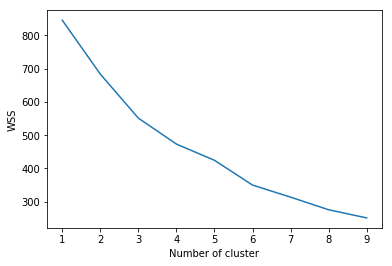

In [36]:
#Plot to figure out the best clusters 
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

In [37]:
#adjusted_rand_score, to check the similarity of the clusters
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [38]:
X_train_std=pd.DataFrame(X_train_std)

In [39]:
X_train_std.shape

(65, 13)

In [40]:
#to retrive the ramdom indices of the rows , as a part of test data
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([22, 32, 33,  8,  6, 56, 40, 20,  4, 21, 50, 54, 29, 18, 45, 55, 36,
            13, 25, 58, 64, 10,  7, 27, 14, 17, 46, 31, 35,  1, 42, 63,  2, 39,
            48, 61,  0, 11,  3, 62, 34, 37, 60,  9, 16,  5, 28, 59, 44, 51, 43,
            30, 26, 41, 23, 49, 15, 57],
           dtype='int64')


In [41]:
Alpha=X_train_std.iloc[indices,:]

In [42]:
#Test data
Alpha

,0,1,2,3,4,5,6,7,8,9,10,11,12
22,0.089357,-0.541084,0.046932,0.130607,-0.482246,0.482027,-0.243003,-0.580088,3.270717,0.967955,-0.289414,0.722058,-0.464122
32,-0.966681,-0.541084,0.046932,0.489315,0.788537,-0.031608,-0.243003,0.385836,-0.158260,-1.451933,-0.289414,-0.682125,0.443205
33,-0.438662,1.360021,1.063799,-0.108532,-0.058652,-0.802061,-0.243003,-0.059975,-0.158260,-0.241989,-0.289414,-0.682125,0.170056
8,0.089357,-0.541084,-0.969935,1.445872,-0.905840,1.766116,-0.919939,-1.100201,-0.158260,-1.451933,-0.289414,0.722058,-0.109639
6,1.673415,0.409469,0.046932,0.369746,0.788537,-0.031608,1.562161,1.946175,3.270717,0.967955,3.094028,0.722058,-1.035381
56,0.089357,-1.491636,-0.969935,0.967594,-0.905840,2.022933,-1.145585,-1.025899,-0.158260,-1.451933,-0.289414,1.275221,-0.069741
40,0.089357,-1.491636,0.046932,0.250176,-0.905840,-0.802061,1.336516,-0.654390,-0.158260,-0.241989,-0.289414,0.722058,-1.457211
20,-0.438662,1.360021,0.046932,-0.287887,-0.058652,-0.288426,-0.243003,0.162931,-0.158260,0.967955,-0.289414,-1.405492,0.471413
4,0.089357,-0.541084,-0.969935,0.728455,-0.482246,1.509298,-0.919939,-1.025899,-0.158260,0.967955,-0.289414,0.722058,0.282967
21,-0.438662,-0.541084,0.046932,0.728455,-0.058652,-0.031608,-0.243003,-0.134277,-0.158260,-1.451933,-0.289414,0.722058,-0.206091


In [43]:
#Clustering on the train data
kmeans = KMeans(n_clusters=6)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

65


In [44]:
#Clustering on the sample (test data)
kmeans = KMeans(n_clusters=6)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

58


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
Alpha.shape

(58, 14)

In [46]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

In [47]:
# 91 percent the clusters are same in train and test 
adjusted_rand_score(g1,g2)

0.5725651146672271

In [48]:
g2

22    4
32    5
33    0
8     5
6     4
56    5
40    3
20    0
4     5
21    5
50    0
54    3
29    3
18    0
45    0
55    2
36    0
13    5
25    0
58    5
64    0
10    0
7     1
27    0
14    3
17    3
46    0
31    5
35    4
1     1
42    1
63    0
2     1
39    5
48    5
61    5
0     4
11    1
3     1
62    5
34    5
37    2
60    4
9     0
16    3
5     1
28    3
59    0
44    1
51    0
43    3
30    0
26    3
41    3
23    0
49    3
15    5
57    0
Name: clus, dtype: int32

In [49]:
g1

22    2
32    1
33    1
8     2
6     0
56    2
40    4
20    1
4     2
21    4
50    0
54    4
29    4
18    0
45    0
55    3
36    0
13    2
25    0
58    2
64    1
10    0
7     5
27    0
14    4
17    4
46    1
31    2
35    0
1     5
42    5
63    1
2     5
39    4
48    2
61    2
0     2
11    5
3     5
62    2
34    1
37    3
60    2
9     1
16    4
5     5
28    4
59    0
44    5
51    1
43    4
30    1
26    4
41    4
23    1
49    4
15    2
57    0
Name: clus, dtype: int32